In [40]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import seaborn as sns

default_user = {
    "income": 60000,
    "crime": "low",
    "weather": "sunny"
}

In [26]:
income_data = pd.read_csv('Individual_Median_Income_MD_Cities(2020).csv')
metrics = ["Entity DCID", "Entity properties name", "Variable observation value"]
income_data.head()

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
0,geoId/2400125,NaN,Aberdeen,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,31838,Median Income of a Population
1,geoId/2400175,NaN,Aberdeen Proving Ground,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,42152,Median Income of a Population
2,geoId/2400200,NaN,Abingdon,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,52767,Median Income of a Population
3,geoId/2400225,NaN,Accident,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,27083,Median Income of a Population
4,geoId/2400250,NaN,Accokeek,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,66531,Median Income of a Population


In [31]:
income_data.isnull().sum()

Entity DCID                                        0
Entity properties isoCode                        500
Entity properties name                             0
Variable DCID                                      0
Variable observation date                          0
Variable observation metadata importName           0
Variable observation metadata provenanceUrl        0
Variable observation metadata scalingFactor      500
Variable observation metadata unit                 0
Variable observation metadata unitDisplayName      0
Variable observation value                         0
Variable properties name                           0
dtype: int64

In [27]:
variable_dcids = income_data["Variable DCID"].unique()[0]
variable_metadata_import_name = income_data["Variable observation metadata importName"].unique()[0]
variable_dcids, variable_metadata_import_name

('Median_Income_Person', 'CensusACS5YearSurvey')

In [28]:
df = income_data[metrics]
df = df.rename(columns={
    "Entity DCID": "DCID",
    "Entity properties name": "City",
    "Variable observation value": "Income",
})

print(df.shape)
df.head()

(500, 3)


,DCID,City,Income
0,geoId/2400125,Aberdeen,31838
1,geoId/2400175,Aberdeen Proving Ground,42152
2,geoId/2400200,Abingdon,52767
3,geoId/2400225,Accident,27083
4,geoId/2400250,Accokeek,66531


In [29]:
df.describe()

,Income
count,500.000000
mean,43074.290000
std,18155.358294
min,2499.000000
25%,31606.000000
50%,40012.500000
75%,52268.250000
max,138500.000000


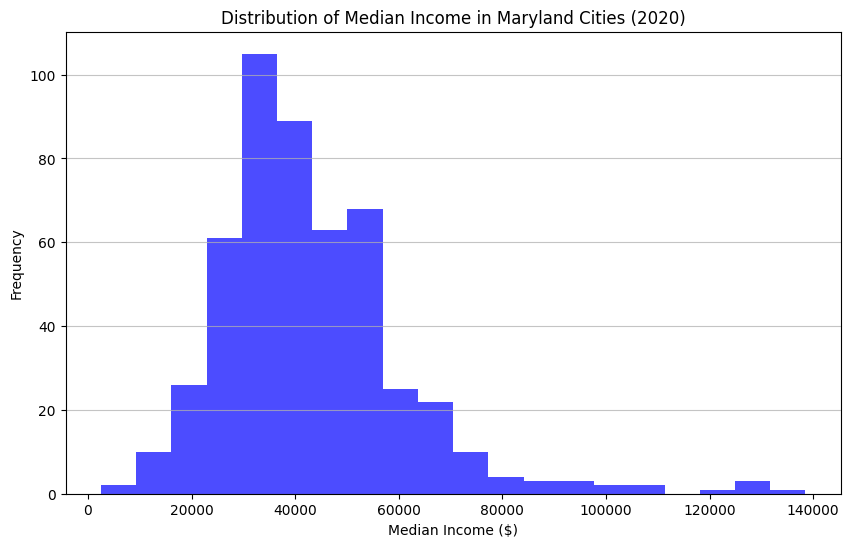

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Median Income in Maryland Cities (2020)')
plt.xlabel('Median Income ($)')
plt.ylabel('Frequency')

plt.hist(df["Income"], bins=20, color='blue', alpha=0.7)
plt.grid(axis='y', alpha=0.75)

plt.show()


### Hypothesis Test: Is the User’s Income Significantly Different from the Average?

We used a one-sample t-test to evaluate whether the user's income is significantly different from the average income across Maryland cities. Since the optimal city depends on user preferences, we created a default profile for this analysis. The default user's income is set at \$60,000.

**Null Hypothesis (H₀):** The mean income of cities in Maryland equals the user's income.  
**Alternative Hypothesis (H₁):** The mean income of cities is different from the user's income.

**Result:**  
T-statistic = -20.85  
P-value < 0.05

**Conclusion:**  
There is strong statistical evidence that the user's income is significantly different from the average income across Maryland cities. The **T-statistic of -20.85** indicates that the average city income is far below the user's income—by over 20 standard errors. The **P-value < 0.05** confirms that this difference is highly unlikely to be due to random chance.

**How this helps the user:**  
This result suggests that the user can afford to live in many cities across Maryland. By comparing the user's income to city-level incomes, we can filter out unaffordable locations and focus recommendations on cities where the cost of living (as proxied by income levels) is within reach. This test supports one part of our goal: helping users find cities that are economically suitable based on their income.


In [41]:
user_income = default_user["income"]
t_stat, p_value = stats.ttest_1samp(df["Income"], user_income)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}")

T-statistic: -20.85, P-value: 0.000


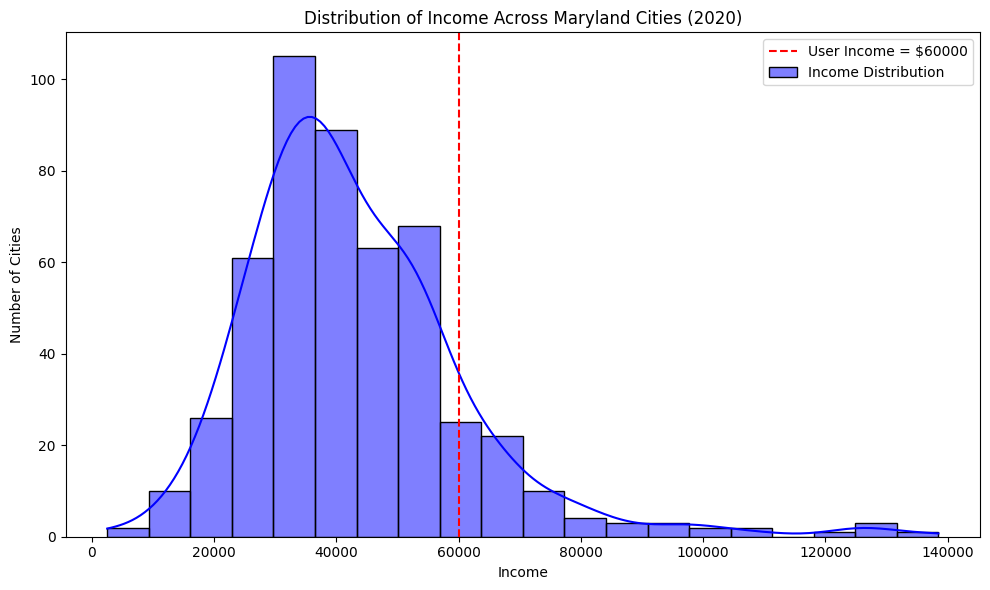

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Income"], bins=20, kde=True, color='blue', label='Income Distribution')
plt.axvline(default_user['income'], color='red', linestyle='--', label=f'User Income = ${default_user['income']}')
plt.title("Distribution of Income Across Maryland Cities (2020)")
plt.xlabel("Income")
plt.ylabel("Number of Cities")
plt.legend()
plt.tight_layout()
plt.show()